<h1 style="color:gray" align="center"><b>Titanic Survival Prediction</b></h1>

# Importing the Dependencies

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Dataset

In [8]:
file_path = "Titanic-Dataset.csv"

In [9]:
data = pd.read_csv(file_path)

In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


The Titanic dataset contains various columns representing passenger information:

1. **PassengerId**: Unique identifier for each passenger.
2. **Survived**: Survival status (0 = No, 1 = Yes).
3. **Pclass**: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd).
4. **Name**: Passenger's name.
5. **Sex**: Gender of the passenger.
6. **Age**: Age of the passenger.
7. **SibSp**: Number of siblings or spouses aboard.
8. **Parch**: Number of parents or children aboard.
9. **Ticket**: Ticket number.
10. **Fare**: Ticket fare.
11. **Cabin**: Cabin number (if known).
12. **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [13]:
data.shape

(891, 12)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
data[['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked']].nunique()

PassengerId    891
Survived         2
Pclass           3
Sex              2
SibSp            7
Parch            7
Cabin          147
Embarked         3
dtype: int64

In [16]:
# Since the number of unique values in PassengerId and Cabin is much, it is been excluded when viewing the unique values
data[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']].apply(pd.Series.unique)

Survived                   [0, 1]
Pclass                  [3, 1, 2]
Sex                [male, female]
SibSp       [1, 0, 3, 4, 2, 5, 8]
Parch       [0, 1, 2, 5, 3, 4, 6]
Embarked           [S, C, Q, nan]
dtype: object

##### Independent Variables:
- PassengerId
- Pclass
- Name
- Sex
- Age
- SibSp
- Parch
- Ticket
- Fare
- Cabin
- Embarked
##### Dependent Variables:
- Survived

# Missing Data Analysis

In [19]:
# Check for missing values
missing_values = data.isnull().sum()

# Calculate the percentage of missing data in each column 
# (for better understanding on how data is missing)
missing_percentage = (missing_values / len(data)) * 100

# Display the missing data statistics
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Percentage of Missing Data:
 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


<Axes: >

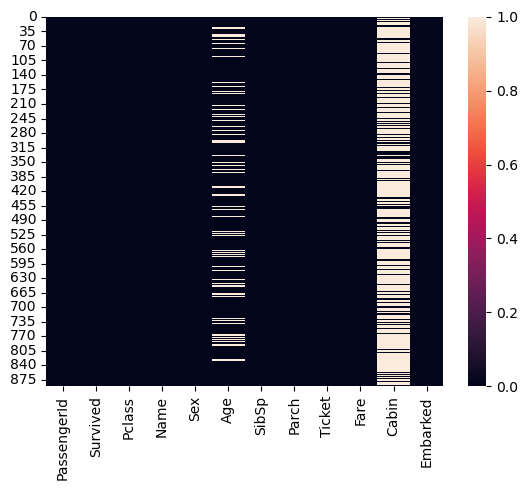

In [20]:
# Missing values heatmap
sns.heatmap(data.isnull())

In [21]:
# We drop column cabin since it cpntains too much missing values (77.1%)
data_cleaned = data.drop('Cabin', axis=1)

# We replace missing values in column Age with the median value
median_age = data_cleaned['Age'].median()
data_cleaned.fillna({'Age': median_age}, inplace=True)

# We replace missing values in column Embarked with the mode value
mode_Embarked = data_cleaned['Embarked'].mode()[0]
data_cleaned.fillna({'Embarked': mode_Embarked}, inplace=True)

In [22]:
# Verify that missing values have been removed
print("\nMissing values in each column after removal:")
print(data_cleaned.isnull().sum())


Missing values in each column after removal:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<Axes: >

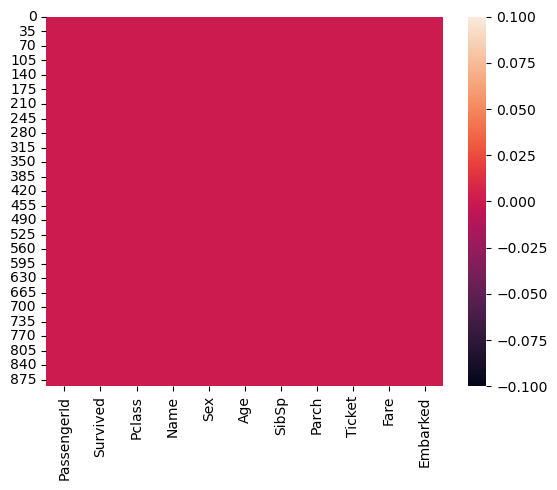

In [23]:
# Missing values heatmap
sns.heatmap(data_cleaned.isnull())

**Now, our data is free from missing values!!!**

# Data Exploration and Visualization

In [26]:
data2 = data_cleaned.copy()

In [27]:
data2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Correlation Heat Map**

In [29]:
data2.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


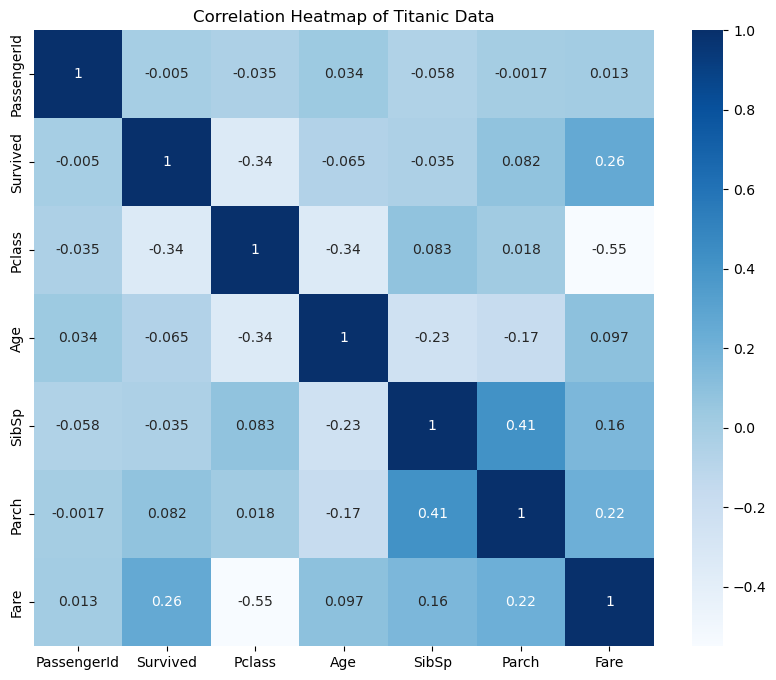

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(data2.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis=1).corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Titanic Data')
plt.show()

In [31]:
# We drop the PassengerId columns since its correlation to the dependent variable (and other columns) is very low
data2.drop('PassengerId', axis=1, inplace=True)

In [32]:
data2.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


# String Data Categorization to Dummy Variables

In [34]:
data3 = data2.copy()

In [35]:
data3.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [36]:
data3[['Name', 'Sex', 'Ticket', 'Embarked']].nunique()

Name        891
Sex           2
Ticket      681
Embarked      3
dtype: int64

In [37]:
# We drop column Name and Ticket since the unique values is too many
data3.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [38]:
data3.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [39]:
# Creating dummy variables for column Sex and Embarked
data3 = pd.get_dummies(data3, columns=['Sex', 'Embarked'])  # One-Hot Encoding

In [40]:
data3.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [41]:
# drop columns to avoid multi-collinearity
data3 = data3.drop(['Sex_male', 'Embarked_S'], axis=1)

In [42]:
data3.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Embarked_C', 'Embarked_Q'],
      dtype='object')

# Handling Imbalance Dataset using SMOTE

Survived
0    549
1    342
Name: count, dtype: int64

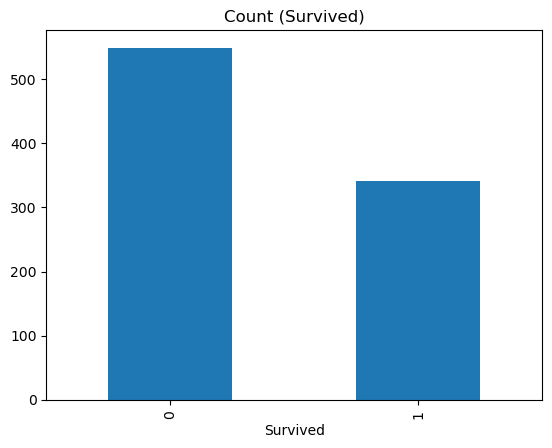

In [44]:
data3.Survived.value_counts().plot(kind='bar', title='Count (Survived)')
data3.Survived.value_counts()

**This is an imbalance in the target values**

In [46]:
X = data3.drop('Survived', axis=1)
y = data3['Survived']

In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Survived
0    549
1    549
Name: count, dtype: int64

# Scaling and Splitting the Data into Train/Test

### Splitting Data

In [50]:
# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, stratify=y_sm, random_state=7)

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 878 samples
Test set size: 220 samples


In [51]:
# To check if data is splitted in a stratified manner
# Based on a specific column we will want our train and test sets to have the 
# same approximate distribution. This is especially important with small datasets.
def check_stratified_split(feature_name):
    fig = plt.figure()
    
    ax1 = fig.add_axes([0, 1, 0.5, 0.5])
    ax2 = fig.add_axes([0.6, 1, 0.5, 0.5])
    ax3 = fig.add_axes([1.2, 1, 0.5, 0.5])
    
    ax1.hist(data3[feature_name], bins=10)
    ax1.set_title(f'Histogram for Whole Data ({feature_name})')
    
    ax2.hist(X_test[feature_name], bins=10)
    ax2.set_title(f'Histogram for X_test ({feature_name})')
    
    ax3.hist(X_train[feature_name], bins=10)
    ax3.set_title(f'Histogram for X_train ({feature_name})')

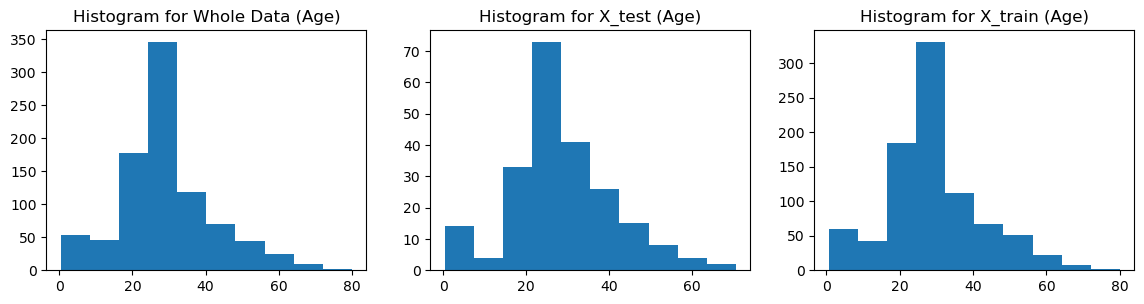

In [52]:
# Check if Age column is splitted in a stratified manner
check_stratified_split('Age')

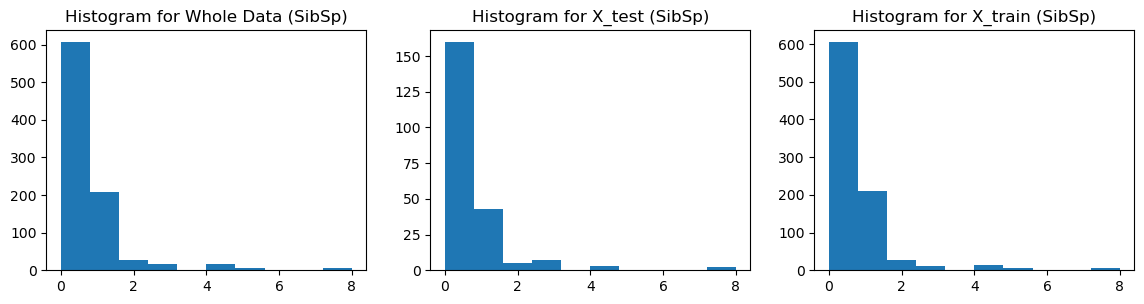

In [53]:
# Check if SibSp column is splitted in a stratified manner
check_stratified_split('SibSp')

### Scaling Data

In [55]:
X_train.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q
431,3,28.0,1,0,16.100000,True,False,False
979,2,28.0,0,0,12.654991,True,False,False


In [56]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [57]:
X_train_scaled.shape

(878, 8)

# Training Models and Hyperparameter Tuning (`GridSearch`)

In [59]:
y_train = y_train.values.ravel()

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, accuracy_score, f1_score

In [61]:
def train_and_evaluate(model , model_name, param_grid):
    # Grid search with 5-fold cross-validation
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid.fit(X_train_scaled, y_train)

    best_model = grid.best_estimator_
    print(f"Training accuracy of {model_name} is {best_model.score(X_train_scaled, y_train)}")
    print(f"Testing accuracy of {model_name} is {best_model.score(X_test_scaled, y_test)}")
    print()
    print(f"Best {model_name} score:", grid.best_score_)
    print(f"Best {model_name} params:", grid.best_params_)
    print()
    ConfusionMatrixDisplay.from_estimator(best_model, X_test_scaled, y_test, cmap='Blues')
    
    y_pred = best_model.predict(X_test_scaled)
    print(model_name, "\nClassification Report: \n", classification_report(y_test, y_pred))

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return best_model, accuracy, f1

### Using Logistic Regression

Training accuracy of Logistic regression is 0.8200455580865603
Testing accuracy of Logistic regression is 0.8

Best Logistic regression score: 0.818896103896104
Best Logistic regression params: {'C': 100, 'solver': 'liblinear'}

Logistic regression 
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.78      0.80       110
           1       0.79      0.82      0.80       110

    accuracy                           0.80       220
   macro avg       0.80      0.80      0.80       220
weighted avg       0.80      0.80      0.80       220



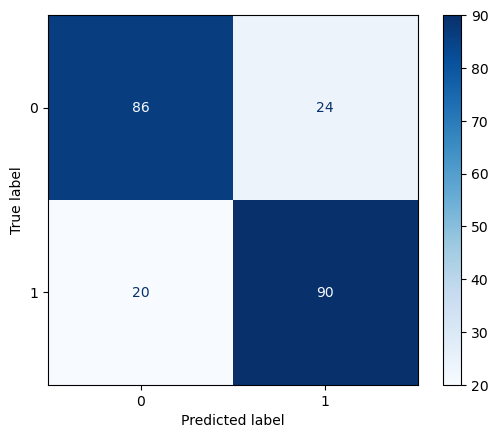

In [63]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lr_model = LogisticRegression()

# Hyperparameters to tune
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

lr_best_model = train_and_evaluate(lr_model, "Logistic regression", lr_param_grid)

### Using SVM

Training accuracy of SVM is 0.8473804100227791
Testing accuracy of SVM is 0.8318181818181818

Best SVM score: 0.8371428571428572
Best SVM params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

SVM 
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.86      0.79      0.82       110

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220



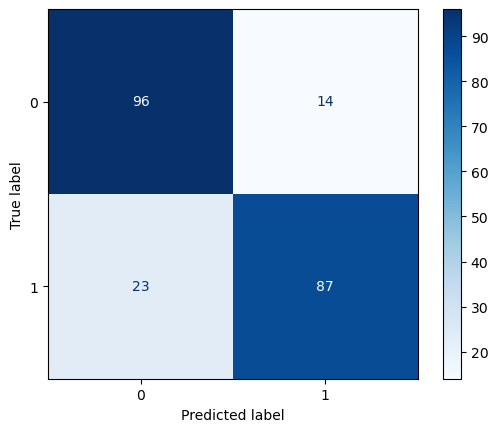

In [65]:
from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# SVM Model
svm_model = SVC()

# Hyperparameters to tune
svm_param_grid = {
    'C': [0.1, 1, 10,],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_best_model = train_and_evaluate(svm_model, "SVM", svm_param_grid)

In [66]:
print(svm_best_model[2])

0.8246445497630331


### Using Random Forest Classifier

Training accuracy of Random Forest is 0.9555808656036446
Testing accuracy of Random Forest is 0.8045454545454546

Best Random Forest score: 0.8599545454545454
Best Random Forest params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

Random Forest 
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       110
           1       0.81      0.79      0.80       110

    accuracy                           0.80       220
   macro avg       0.80      0.80      0.80       220
weighted avg       0.80      0.80      0.80       220



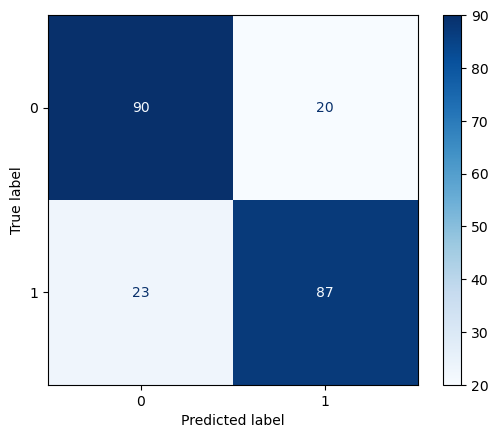

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rfc_model = RandomForestClassifier(random_state=42)

# Hyperparameters to tune
rfc_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rfc_best_model = train_and_evaluate(rfc_model, "Random Forest", rfc_param_grid)

### Using Gradient Boosting (XGBoost)

Training accuracy of XGBoost is 0.9738041002277904
Testing accuracy of XGBoost is 0.8272727272727273

Best XGBoost score: 0.8474155844155845
Best XGBoost params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}

XGBoost 
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.81      0.82       110
           1       0.82      0.85      0.83       110

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220



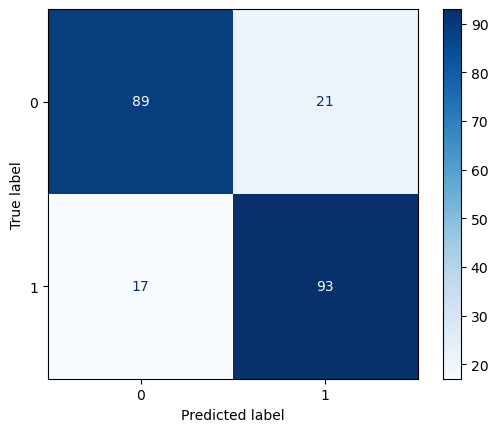

In [70]:
import xgboost as xgb
from xgboost import XGBClassifier

# XGBoost
xgb_model = XGBClassifier(eval_metric='logloss')

# Hyperparameters to tune
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb_best_model = train_and_evaluate(xgb_model, "XGBoost", xgb_param_grid)

### Using Artificial Neural Network (ANN)

In [72]:
input_shape = len(X_train_scaled[0])
input_shape

8

In [73]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

ann_model = Sequential([
    Input(shape=(input_shape,)),
    Dense(7,  activation='relu'),
    Dense(3,  activation='relu'),
    Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

ann_model.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5510 - loss: 0.7223 
Epoch 2/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5581 - loss: 0.6967 
Epoch 3/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5695 - loss: 0.6689 
Epoch 4/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5760 - loss: 0.6649 
Epoch 5/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6741 - loss: 0.6167 
Epoch 6/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6867 - loss: 0.6144 
Epoch 7/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7505 - loss: 0.5848 
Epoch 8/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7908 - loss: 0.5744 
Epoch 9/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7746 - loss: 0.5707 
Epoch 10/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7920 - loss: 0.5650 
Epoch 11/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8097 - loss: 0.5417 
Epoch 12/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

In [74]:
print(ann_model.evaluate(X_test_scaled, y_test))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8398 - loss: 0.4226  
[0.4020400047302246, 0.8454545736312866]


In [75]:
yp = ann_model.predict(X_test_scaled)

y_preds_ann = []
for element in yp:
    if element > 0.5:
        y_preds_ann.append(1)
    else:
        y_preds_ann.append(0)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [76]:
y_preds_ann[:10]

[0, 0, 1, 1, 0, 0, 1, 1, 0, 0]

ANN Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.87      0.81      0.84       110

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220



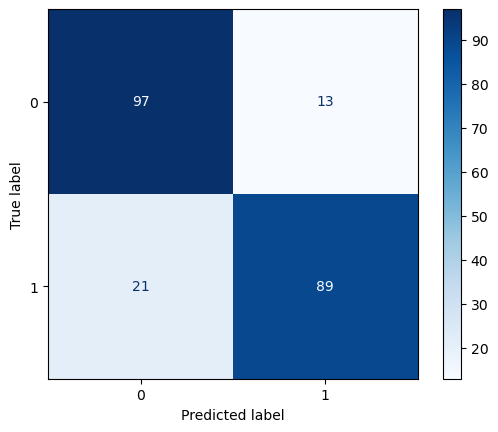

In [77]:
print("ANN Classification Report: \n", classification_report(y_test, y_preds_ann))

cm = confusion_matrix(y_test, y_preds_ann)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [78]:
ann_accuracy = accuracy_score(y_test, y_preds_ann)
ann_f1 = f1_score(y_test, y_preds_ann)

### Compare Models to choose Best

In [80]:
def compare_models(models):
    print("{0:20} :: {1:10} | {2:10}".format("Model Name", "accuracy", "f1_score"))
    for model in models:
         print("{0:20} :: {1:.4} | {2:.4}".format(model[0], model[1][1], model[1][2]))

In [81]:
models = [
    ["Logistic Regression", lr_best_model], 
    ["SVM", svm_best_model], 
    ["Random Forest", rfc_best_model], 
    ["XGBoost", xgb_best_model]
]

In [82]:
compare_models(models)
print("{0:20} :: {1:.4} | {2:.4}".format("ANN", ann_accuracy, ann_f1))

Model Name           :: accuracy   | f1_score  
Logistic Regression  :: 0.8 | 0.8036
SVM                  :: 0.8318 | 0.8246
Random Forest        :: 0.8045 | 0.8018
XGBoost              :: 0.8273 | 0.8304
ANN                  :: 0.8455 | 0.8396


<h4>The <b style="color:green">XGBoost Model</b> has the best.</h4>

In [84]:
best_model = xgb_best_model[0]

# Train/Test Using Best Model

In [86]:
best_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [87]:
best_model.score(X_test_scaled, y_test)

0.8272727272727273

In [88]:
y_model_predicted = best_model.predict(X_test_scaled)
y_model_predicted

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1])

[[89 21]
 [17 93]]


Text(0.5, 1.0, '')

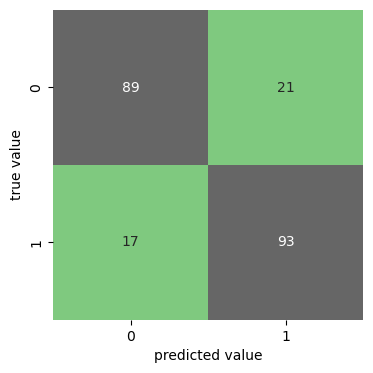

In [89]:
mat = confusion_matrix(y_test, y_model_predicted)
print(mat)
plt.figure(figsize=(4, 10))
sns.heatmap(mat, square=True, annot=True, cmap='Accent', cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.title('')

In [90]:
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Embarked_C',
       'Embarked_Q'],
      dtype='object')

In [91]:
X_test.shape[1]

8

In [92]:
def predict_survival(Pclass, Age, SibSp, Parch, Fare, Sex, Embarked):
    x = np.zeros(X_test.shape[1]) 

    if (Sex == "female"):
        Sex_female = True
    else:
        Sex_female = False

    if (Embarked == 'Q'):
        Embarked_Q = True
        Embarked_S = False
    elif (Embarked == 'S'):
        Embarked_Q = False
        Embarked_S = True
    else:
        Embarked_Q = False
        Embarked_S = False

    x[0] = Pclass
    x[1] = Age
    x[2] = SibSp
    x[3] = Parch
    x[4] = Fare
    x[5] = Sex_female
    x[6] = Embarked_Q
    x[7] = Embarked_S

    x = scaler.transform(x.reshape(1, -1))
    
    return best_model.predict(x)[0]

In [93]:
import warnings
warnings.filterwarnings("ignore")

In [94]:
predict_survival(3, 22, 1, 0, 7.25, "male", "S")

0

In [95]:
predict_survival(1, 38, 1, 0, 71.2833, "female", "C")

1

In [96]:
predict_survival(3, 35, 0, 0, 8.4583, "male", "Q")

0

In [97]:
predict_survival(3,	27.0, 0, 2, 11.1333, "female", "S")

1

In [98]:
predict_survival(1, 58.0, 0, 0, 26.5500, "female", "S")

1

# Export Model and Columns

In [100]:
# Export model
import pickle
with open('titanic_model.pickle', 'wb') as f:
    pickle.dump(best_model, f)

In [101]:
# Export the columns and the way they are structured into a json file
import json
columns = {
    'data_columns' : [col for col in X_test.columns]
}

with open("titanic_columns.json","w") as f:
    f.write(json.dumps(columns))

In [102]:
# Export scaler
with open('titanic_scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)